In [1]:
tardbp.counts <- read.csv('~/biom262_2019/Module_1//featurecounts//tardbp_counts_with_length.csv', header = T)

# create a samller version
sub.tardbp <- tardbp.counts[1:10,]

head(sub.tardbp)

# notice how all factors are still present
sub.tardbp[,1]

Geneid,Length,NT_shRNA_hepg2_rep1,NT_shRNA_hepg2_rep2,TARDBP_shRNA_hepg2_rep1,TARDBP_shRNA_hepg2_rep2
ENSG00000227232.5_2,1351,27,42,40,35
ENSG00000238009.6_6,3726,0,4,4,8
ENSG00000237683.5,2661,22,20,16,27
ENSG00000239906.1_5,323,6,2,3,7
ENSG00000241860.6_5,6195,26,32,35,35
ENSG00000228463.4,3954,77,69,63,67


[1] ENSG00000227232.5_2  ENSG00000238009.6_6  ENSG00000237683.5   
 [4] ENSG00000239906.1_5  ENSG00000241860.6_5  ENSG00000228463.4   
 [7] ENSG00000230021.10_5 ENSG00000225972.1_4  ENSG00000225630.1_4 
[10] ENSG00000237973.1_4 
19021 Levels: ENSG00000000003.14_2 ENSG00000000419.12_2 ... ENSG00000285976.1_1

In [2]:
# look at the bottom of the full gene list
tail(tardbp.counts)

,Geneid,Length,NT_shRNA_hepg2_rep1,NT_shRNA_hepg2_rep2,TARDBP_shRNA_hepg2_rep1,TARDBP_shRNA_hepg2_rep2
19016,ENSG00000198786.2,1812,834651,823476,1092613,1188163
19017,ENSG00000198695.2,525,8467,9261,4027,3535
19018,ENSG00000210194.1,69,41,44,21,13
19019,ENSG00000198727.2,1141,355074,351360,484506,514281
19020,ENSG00000210195.2,66,306,332,395,433
19021,ENSG00000210196.2,68,99,93,52,49


In [3]:
'ENSG00000198786.2' %in% sub.tardbp[,1] # this gene is taken from the tail of the original list. Should not be in the sub data frame
'ENSG00000227232.5_2' %in% sub.tardbp[,1] # this gene is taken from the sub data frame. Should be present

[1] FALSE

[1] TRUE

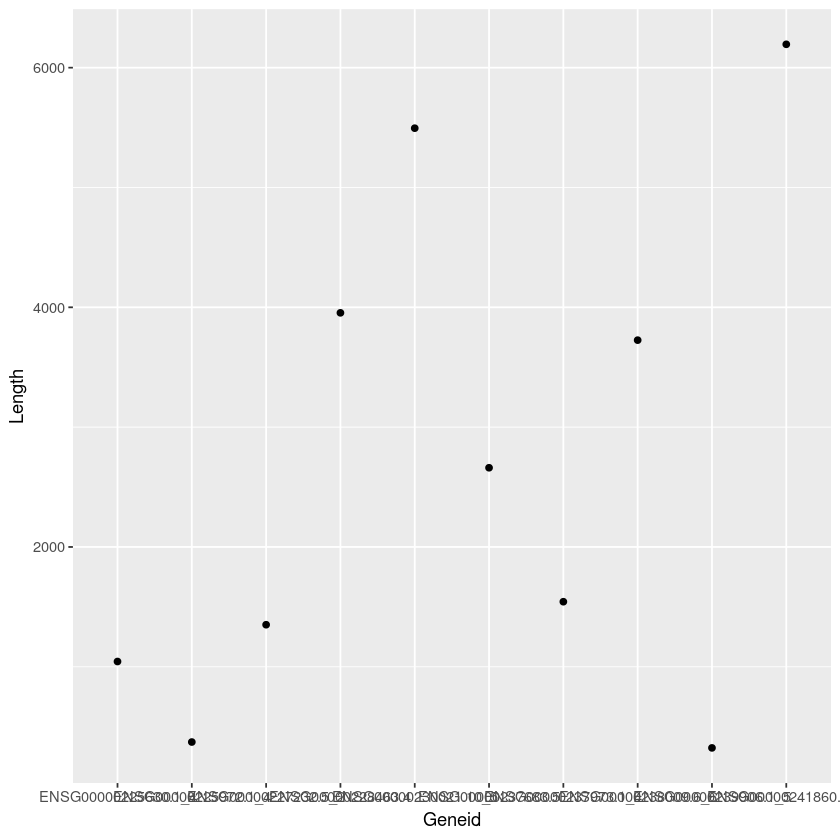

In [4]:
library(ggplot2)

# try plotting the length by gene
p <- ggplot(data = sub.tardbp) + geom_point(aes(x = Geneid, y = Length))
print(p)

In [5]:
# create a samll data frame (didn't specify stringsAsFactors = F so the first column will be factors)
small.df <- data.frame(one = c('c', 'a', 'b'), two = c(1:3), three = c(3,1,2))
small.df[,1]

# sort the data frame by the last column (such that a, b, c are in order)
sorted.small.df <- small.df[order(small.df$three),]

small.df
sorted.small.df

[1] c a b
Levels: a b c

one,two,three
c,1,3
a,2,1
b,3,2


,one,two,three
2,a,2,1
3,b,3,2
1,c,1,3


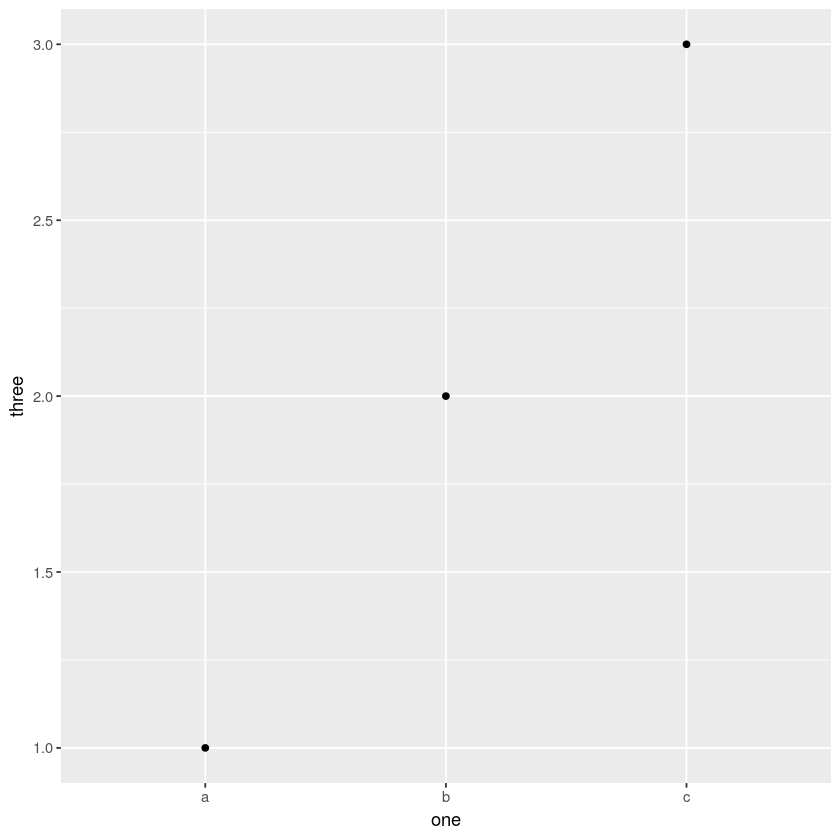

In [6]:
# plot the ordered data frame, see if factors mess up that ordering
ggplot(data = sorted.small.df) + geom_point(aes(x = one, y = three))


one,two,three
c,1,3
a,2,1
b,3,2


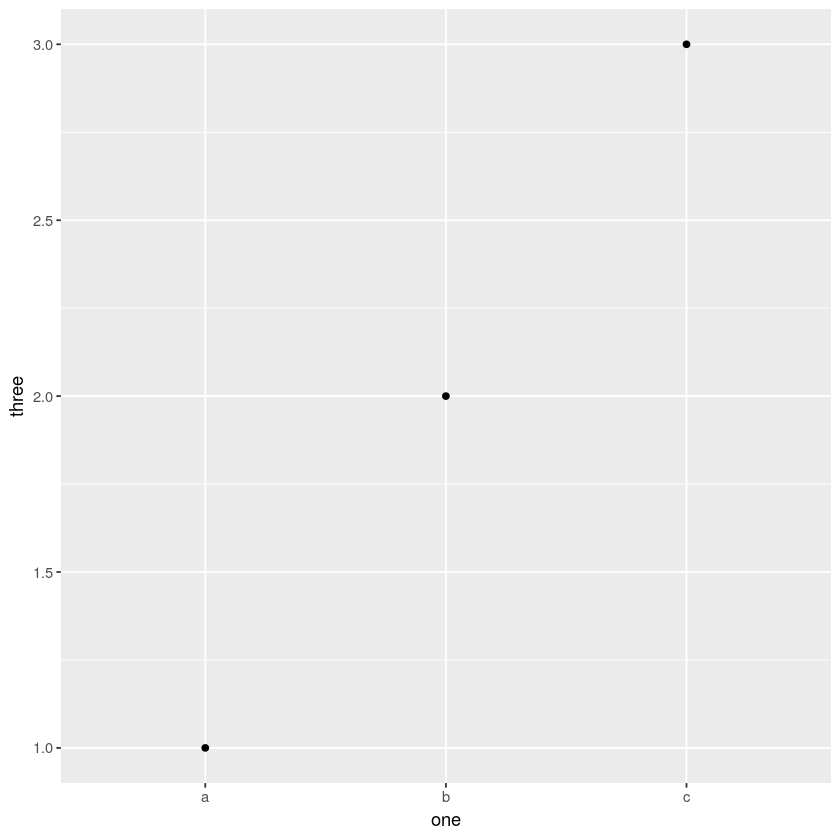

In [7]:
# now plot the unsorted data frame
ggplot(data = small.df) + geom_point(aes(x = one, y = three))

small.df

[1] "c" "a" "b"

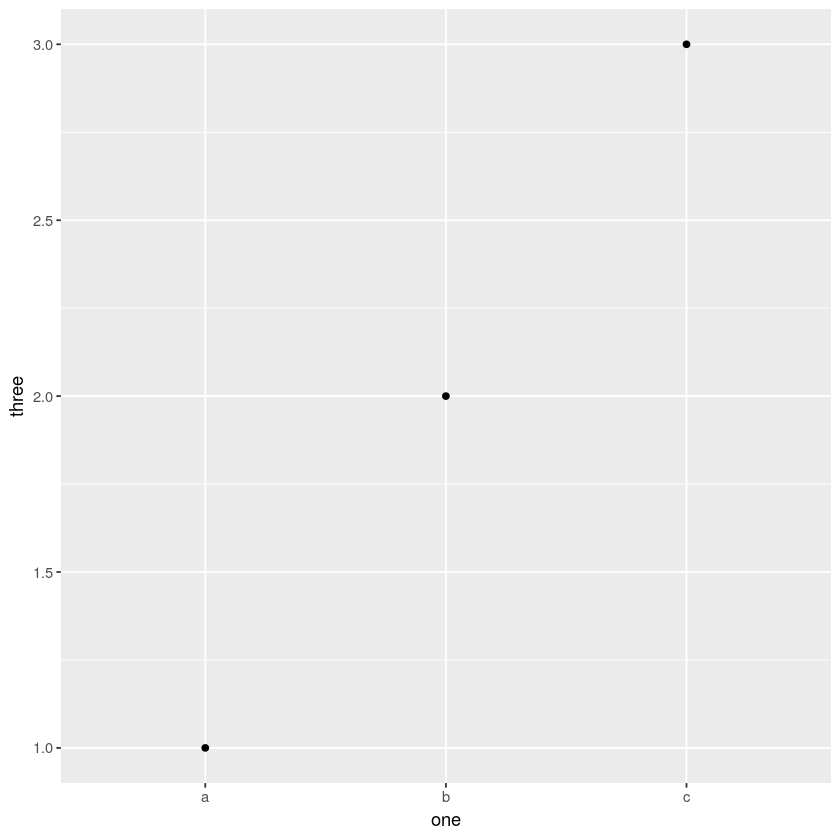

In [8]:
# generate a data frame without any levels
small.noFactor.df <- data.frame(one = c('c', 'a', 'b'), two = c(1:3), three = c(3,1,2), stringsAsFactors = F)
small.noFactor.df[,1]

# notice how ggplot still ordered by levels. This is because ggplot converts strings to factors (sorted factors)
ggplot(data = small.noFactor.df) + geom_point(aes(x = one, y = three))

[1] c a b
Levels: c a b

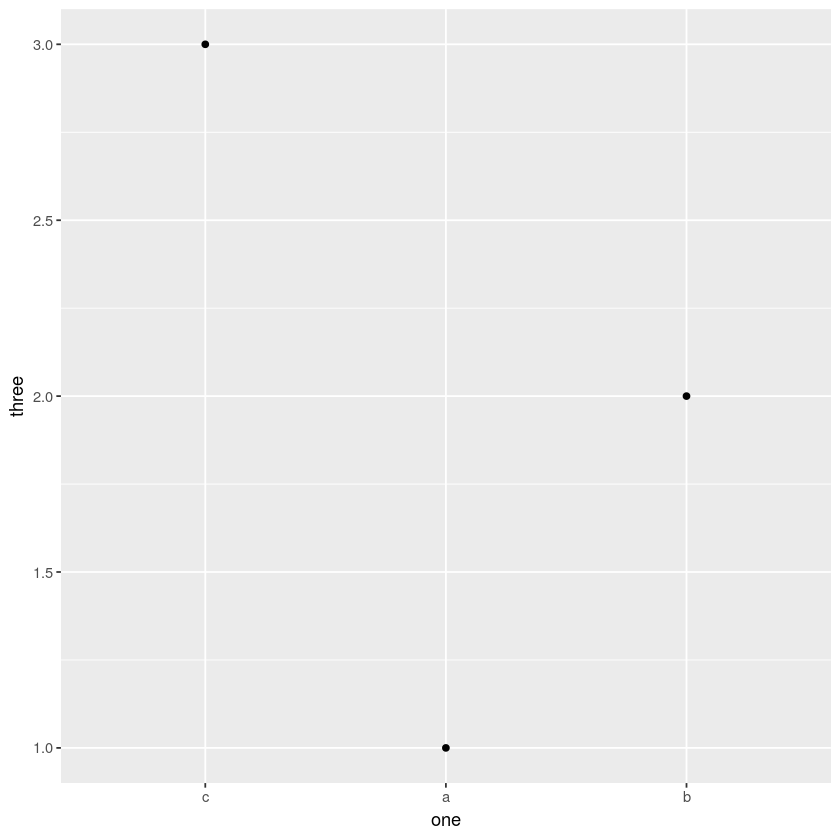

In [9]:
# instead the factors have to be pre-specified as a sertain order:
small.noFactor2.df <- small.noFactor.df
small.noFactor2.df$one <- factor(small.noFactor2.df$one, levels = small.noFactor2.df$one) # specify the order as: c, a, b
small.noFactor2.df$one

# now this works
ggplot(data = small.noFactor2.df) + geom_point(aes(x = one, y = three))